# 미니 프로젝트 : 가위바위보 분류기를 만들자!

## 데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob, os
import matplotlib.pyplot as plt


print("PIL 라이브러리 import를 완료했습니다.")

PIL 라이브러리 import를 완료했습니다.


### 학습데이터 가위 이미지 조정하기

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("학습데이터 가위 이미지 조정 완료!")

932 개의 이미지 크기를 조정하겠습니다.
932 개의 이미지 크기를 조정했습니다.
학습데이터 가위 이미지 조정 완료!


### 학습데이터 바위 이미지 조정하기

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("학습데이터 바위 이미지 조정 완료!")

932 개의 이미지 크기를 조정하겠습니다.
932 개의 이미지 크기를 조정했습니다.
학습데이터 바위 이미지 조정 완료!


### 학습데이터 보 이미지 조정하기

In [4]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("학습데이터 보 이미지 조정 완료!")

932 개의 이미지 크기를 조정하겠습니다.
932 개의 이미지 크기를 조정했습니다.
학습데이터 보 이미지 조정 완료!


## 데이터 읽는 함수 쓰기

In [5]:
import numpy as np

def load_data(img_path, no_data=2796):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    imgs=np.zeros(no_data*img_size*img_size*color,dtype=np.int32).reshape(no_data,img_size,img_size,color)
    labels=np.zeros(no_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2796 입니다.
x_train shape: (2796, 100, 100, 3)
y_train shape: (2796,)


라벨:  0


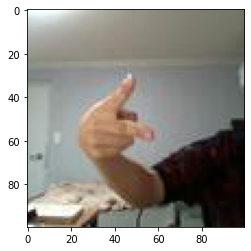

In [6]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

## 딥러닝 네트워크 학습시키기

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
88/88 [==============================] - 4s 9ms/step - loss: 0.9879 - accuracy: 0.4671
Epoch 2/10
88/88 [==============================] - 1s 7ms/step - loss: 0.6067 - accuracy: 0.7343
Epoch 3/10
88/88 [==============================] - 1s 7ms/step - loss: 0.2715 - accuracy: 0.8970
Epoch 4/10
88/88 [==============================] - 1s 7ms/step - loss: 0.1045 - accuracy: 0.9678
Epoch 5/10
88/88 [==============================] - 1s 7ms/step - loss: 0.0306 - accuracy: 0.9893
Epoch 6/10
88/88 [==============================] - 1s 7ms/step - loss: 0.0328 - accuracy: 0.9907
Epoch 7/10
88/88 [==============================] - 1s 7ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 8/10
88/88 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/10
88/88 [==============================] - 1s 8ms/step - loss: 9.1415e-04 - accuracy: 0.9996
Epoch 10/10
88/88 [==============================] - 1s 7ms/step - loss: 3.7226e-04 - accuracy: 1.0000


## 얼마나 잘 만들었는지 확인하기(테스트)

### 시험데이터 가위 이미지 조정하기

In [9]:
def resize_images(img_path):
    images=glob.glob(img_path + "/tscissor/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
resize_images(image_dir_path)

print("시험데이터 가위 이미지 조정 완료!")

200 개의 이미지 크기를 조정하겠습니다.
200 개의 이미지 크기를 조정했습니다.
시험데이터 가위 이미지 조정 완료!


### 시험데이터 바위 이미지 조정하기

In [10]:
def resize_images(img_path):
    images=glob.glob(img_path + "/trock/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
resize_images(image_dir_path)

print("시험데이터 바위 이미지 조정 완료!")

200 개의 이미지 크기를 조정하겠습니다.
200 개의 이미지 크기를 조정했습니다.
시험데이터 바위 이미지 조정 완료!


### 시험데이터 보 이미지 조정하기

In [11]:
def resize_images(img_path):
    images=glob.glob(img_path + "/tpaper/*.jpg")
    
    print(len(images), "개의 이미지 크기를 조정하겠습니다.")

#사진 파일을 100x100 사이즈로 바꾸기
    target_size=(100,100)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "개의 이미지 크기를 조정했습니다.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"
resize_images(image_dir_path)

print("시험데이터 보 이미지 조정 완료!")

200 개의 이미지 크기를 조정하겠습니다.
200 개의 이미지 크기를 조정했습니다.
시험데이터 보 이미지 조정 완료!


In [12]:
import numpy as np

def load_data(img_path, no_data=600):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=100
    color=3
    imgs=np.zeros(no_data*img_size*img_size*color,dtype=np.int32).reshape(no_data,img_size,img_size,color)
    labels=np.zeros(no_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/tscissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/trock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/tpaper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 100, 100, 3)
y_test shape: (600,)


In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 1.0981 - accuracy: 0.7067
test_loss: 1.0981167554855347 
test_accuracy: 0.7066666483879089
